# Project 1

Kai Bagley - 21984315

## Data Exploration

#### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
from spacy.matcher import Matcher, DependencyMatcher
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

#### Load JSON file

In [6]:
df = pd.read_json("./frames.json")

##### Main Table

In [7]:
df.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


##### Main -> Labels

`userSurveyRating` that shows the users satisfaction, from 1 - 5.
`wizardSurveyTaskSuccessful` is a boolean value, shows whether or not the user's goal was successful

##### Main -> Turns

In [8]:
pd.json_normalize(df.turns).head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,{'text': 'I'd like to book a trip to Atlantis ...,{'text': 'Hi...I checked a few options for you...,"{'text': 'Yes, how about going to Neverland fr...",{'text': 'I checked the availability for this ...,{'text': 'I have no flexibility for dates... b...,{'text': 'I checked the availability for that ...,{'text': 'I suppose I'll speak with my husband...,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'text': 'Hello, I am looking to book a vacati...","{'text': 'Hi. Sorry, I can't find any trips fr...",{'text': 'What about a trip from Gotham City t...,"{'text': 'Sorry, I cannot find any trips leavi...",{'text': 'Would any packages to Mos Eisley be ...,{'text': 'There are no trips available to Mos ...,"{'text': 'You know what, I'd like to try and v...",{'text': 'I cannot find any trips available to...,{'text': 'Do you have any trips from Gotham Ci...,{'text': 'I can book you a 3 day trip to Kobe ...,...,None,None,None,None,None,None,None,None,None,None
2,{'text': 'Hello there i am looking to go on a ...,{'text': 'when would you like to travel and h...,"{'text': 'Not sure when we want to leave, but ...","{'text': 'do you have a budget?', 'author': 'w...","{'text': 'yes i do, it is around $2200', 'auth...","{'text': 'where will you be travelling from?',...","{'text': 'We are from Neverland', 'author': 'u...",{'text': 'We have nothing available leaving fr...,"{'text': 'we can depart from Toronto', 'author...",{'text': 'Gotham City is not a destination we ...,...,None,None,None,None,None,None,None,None,None,None
3,{'text': 'Hi I'd like to go to Caprica from Bu...,{'text': 'And what would be your maximum budge...,{'text': 'Actually it's unlimited for this tri...,{'text': 'How many adults and how many childre...,"{'text': '2 adults', 'author': 'user', 'timest...",{'text': 'I have no trips to Caprica from Busa...,{'text': 'Do you have anything for San Antonio...,"{'text': 'Yes, I do. I have one for 8445.37 U...","{'text': 'Is breakfast included?', 'author': '...","{'text': 'Yes, it is.', 'author': 'wizard', 't...",...,None,None,None,None,None,None,None,None,None,None
4,"{'text': 'Hello, I am looking to book a trip f...",{'text': 'I have several options available wit...,{'text': 'I do not have any dates in mind. I w...,{'text': 'I can book 7 days at a 4.0 star hote...,{'text': 'Do these packages have different dep...,{'text': 'The 3.0 star trip leaves Kochi Augus...,"{'text': 'Ok, I would like to purchase the tri...","{'text': 'Perfect, I will book that trip for y...","{'text': 'Thank you', 'author': 'user', 'times...",None,...,None,None,None,None,None,None,None,None,None,None


##### Main -> Turns -> Labels -> Frames

In [9]:
pd.DataFrame(df.turns[0][0]["labels"]["frames"])

,info,frame_id,requests,frame_parent_id,binary_questions,compare_requests
0,"{'intent': [{'val': 'book', 'negated': False}]...",1,[],None,[],[]


Above is the `labels` -> `frames` structure, which is present in every single turn. This is shown above. 

The general structure of the `frames.json` file is shown above, with each row being a different instance of interaction between a wizard and a user. `user_id`, `wizard_id` and `id` are pretty self-explanatory, and `labels` is a user review, and a task success indicator.

`turns` is where the conversation is stored, along with all the information gleaned by the wizard from the user, and any bookings the wizard could/couldn't find in the database.

#### What's the structure of a conversation in the `frames.json` file? Display it as a table

In [10]:
pd.DataFrame(df.turns[0])

,text,labels,author,timestamp,db
0,I'd like to book a trip to Atlantis from Capri...,"{'acts': [{'args': [{'val': 'book', 'key': 'in...",user,1.471272e+12,NaN
1,"Hi...I checked a few options for you, and unfo...",{'acts': [{'args': [{'val': [{'annotations': [...,wizard,1.471272e+12,{'result': [[{'trip': {'returning': {'duration...
2,"Yes, how about going to Neverland from Caprica...","{'acts': [{'args': [{'val': 'Neverland', 'key'...",user,1.471273e+12,NaN
3,I checked the availability for this date and t...,{'acts': [{'args': [{'val': [{'annotations': [...,wizard,1.471273e+12,"{'result': [[], [], [], [], [], []], 'search':..."
4,I have no flexibility for dates... but I can l...,"{'acts': [{'args': [{'val': False, 'key': 'fle...",user,1.471273e+12,NaN
5,I checked the availability for that date and t...,{'acts': [{'args': [{'val': [{'annotations': [...,wizard,1.471273e+12,"{'result': [[]], 'search': [{'ORIGIN_CITY': 'A..."
6,I suppose I'll speak with my husband to see if...,"{'acts': [{'args': [], 'name': 'thankyou'}], '...",user,1.471273e+12,NaN


Above is the structure of the first conversation in the `frames` file. Each line represents a message sent between the user and the wizard, shown by column `author`. `text` is the message itself, `labels` contains all of the arguments, acts and intents, including the previous frames created throughout the conversation.

#### What are the unique intents recorded in the file? What is the distribution of intents?

We can see the intent for each message sent by any user, we will look at every turn. These can be found as follows:

In [11]:
df.turns[116][4]["labels"]["frames"][0]["info"]["intent"]

[{'val': 'book', 'negated': False}]

And we can find a list of unique instances, and plot these (one intent per frame):

In [12]:
intent_list = [] 

for dialogue in df.turns:
    # Iterate over all conversations
    # Find last turn, and access list of frames
    frames = dialogue[-1]["labels"]["frames"]
    for frame in frames:
        # iterate over every frame created in the conv
        info = frame["info"]
        if "intent" in info:
            intent_list.append(info["intent"][0])

In [13]:
[{x["negated"]:x for x in intent_list}.values()]

[dict_values([{'val': 'book', 'negated': False}, {'val': 'book', 'negated': True}])]

The unique intents are shown above, where all intents are related to "book", and are either negated or not.

The intents are binomially distributed, as they can only be book, or not book.

In [14]:
# Make the intent_list plottable
intent_plt = []

for intent in intent_list:
    intent_plt.append(int(intent["negated"]))

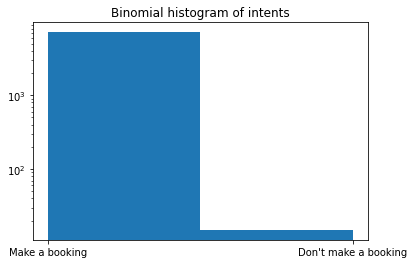

In [15]:
fig, ax = plt.subplots()

ax.hist(intent_plt, log=True, bins=2)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Make a booking", "Don't make a booking"])
ax.set_title("Binomial histogram of intents")
plt.show()

Above is a histogram representing the binomial distribution of the intents of every act in the corpus.

We can also plot the Dialogue Act Frequency to give us a more interesting plot than the above one. There is one or more dialogue acts per turn.

In [16]:
# Find all acts
df.turns[0][3]["labels"]["acts"][0].keys()

dict_keys(['args', 'name'])

In [17]:
act_list = [] 

for dialogue in df.turns:
    # Iterate over all conversations
    for turn in dialogue:
        # Iterate over every turn
        acts = turn["labels"]["acts"]
        for act in acts:
            # Iterate over every act
            if "name" in act:
                act_list.append(act["name"])

In [18]:
act_counts = pd.DataFrame(act_list).value_counts()
act_counts.index = [x[0] for x in act_counts.index]

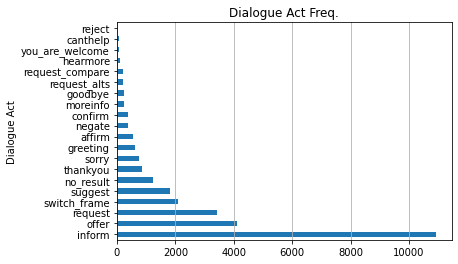

In [19]:
fig, ax = plt.subplots()

nbins = len(set(act_list))

ax = act_counts.plot(kind="barh")
ax.set_title("Dialogue Act Freq.")
ax.set_ylabel("Dialogue Act")
ax.xaxis.grid(True)

plt.show()

#### Find queries of each difficulty in the corpus

Low difficulty queries include a known destination, inflexible time period, budget and amount of people. 

Medium difficulty queries have one flexible parameter, and may need the number of travelers clarified.

Hard difficulty has even more flexibility, and user requests comparison of packages.

We will only check the first utterance of each dialogue, which corresponds to the first frame.

In [20]:
count = 0
easy  = 0
med   = 0
hard  = 0

easy_ix = []

def flex_count(frame_info, keys):
    
    flex = 0
    if "budget" not in keys or frame_info["budget"][0]["val"] == -1:
        flex += 1
    if "or_city" not in keys or frame_info["or_city"][0] == -1:
        flex += 1
    if "dst_city" not in keys or frame_info["dst_city"][0] == -1:
        flex += 1
    if "str_date" not in keys or frame_info["str_date"][0] == -1:
        flex += 1
    if "end_date" not in keys or frame_info["end_date"][0] == -1:
        flex += 1
    if "n_adults" not in keys or frame_info["n_adults"][0]["val"] == -1:
        flex += 1
    if "n_children" not in keys or frame_info["n_children"][0]["val"] == -1:
        flex += 1
        
    return flex

def check_easy(frame_info):
    keys = frame_info.keys()
    
    # Must have no flexibility
    if flex_count(frame_info, keys) != 0:
        return False
    
    return True

def check_med(frame_info):
    keys = frame_info.keys()
    
    # Only need one flexible thing
    if flex_count(frame_info, keys) == 1:
        return True
    
    return False
    
def check_hard(frame_info):
    keys = frame_info.keys()
    
    # Need more than one flexible thing
    if flex_count(frame_info, keys) >= 2:
        return True
    
    return False

for (i, dialogue) in enumerate(df.turns):
    frame = dialogue[0]["labels"]["frames"][0]
    frame_info = frame["info"]

    count += 1
    
    if check_easy(frame_info):
        easy += 1
        easy_ix.append(i)
        continue
    if check_med(frame_info):
        med += 1
        continue
    if check_hard(frame_info) or frame["compare_requests"] != []:
        hard += 1
        continue

print("no. : ", count)
print("easy: ", easy)
print("med : ", med)
print("hard: ", hard)
        

no. :  1369
easy:  3
med :  14
hard:  1352


#### Vocabulary and Word Frequency

We will find a list of all words, only including alphanumeric values (no punctuation), and no stop words.

The reason I am removing the punctuation and stop words is becasue the vocabularies will have a lot of almost meaningless symbols, and the word frequency will just have extremely common stopwords such as "the" and "a", etc. I though this might not be as informative it could be.

In [21]:
# This method isn't too slow, but seems just as fast as 
# using pandas applymap and stuff

# And since there isn't quite too many words, I'll just 
# make a huge list of them all
stopwords = set(nltk.corpus.stopwords.words("english"))
user_text = []
wiz_text  = []

for dialogue in df.turns:
    for (i, turn) in enumerate(dialogue):
        tokens = word_tokenize(turn["text"])
        # Set to lowercase
        tokens = [token.lower() for token in tokens if token.isalnum()]
        # Remove stopwords
        tokens = [token for token in tokens if not token in stopwords]
        if i%2 == 0:
            # dialogue alternates between user and wiz,
            # starting with user
            user_text += tokens
            continue
        wiz_text += tokens

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/kaiba/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
print("User vocab: ", len(set(user_text)))
print("Wizard vocab: ", len(set(wiz_text)))

Vocabularies consist of 3797 unique words for the users, and 2229 unique words for the wizards.

Now we can find the frequency distributions, without any punctuation or stopwords.

In [22]:
userfd_mc = nltk.FreqDist(user_text).most_common(10)
wizfd_mc  = nltk.FreqDist(wiz_text).most_common(10)

NameError: name 'user_text' is not defined

We will plot the 10 most common words in the whole corpus

NameError: name 'userfd_mc' is not defined

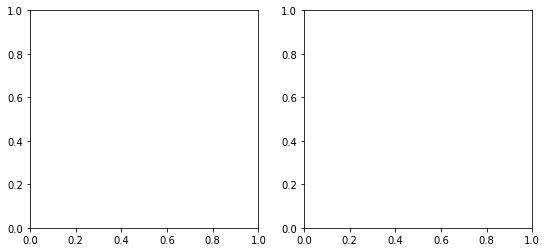

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

y_pos = np.arange(10)

axs[0].barh(y_pos, [x[1] for x in userfd_mc], align="center")
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels([x[0] for x in userfd_mc])
axs[0].set_xlabel("Word Count")
axs[0].set_title("For Users")

axs[1].barh(y_pos, [x[1] for x in wizfd_mc], align="center")
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels([x[0] for x in wizfd_mc])
axs[1].set_xlabel("Word Count")
axs[1].set_title("For Wizards")

fig.tight_layout(pad=3)
fig.suptitle("Freq. Dist. for 10 Most Common Words:")

plt.show()

### Data Preprocessing

Consider the following pre-processing steps, and report vocabulary size for users and wizards, respectively, after each step:

* Tokenize
* Lemmatize and compare with stemming
* Retokenize frequent noun phrases
* Remove stop words (rank words according TF/IDF)

We will start from scratch in this section, ignoring whatever manipulation I've done in the section before this one.

#### Tokenize

First, I will create two lists, one for user turnn and one for wizard turns. These lists will have one element for each dialogue in the dataset, and each element in the lists will be the concatenated texts authored by the user OR the wizard.

So we will have a user corpus, and a wizard corpus, where each doc in the corpora will be a turn written by the respective author.

In [24]:
user_text = []
wizd_text = []

for dialogue in df.turns:
    for (i, turn) in enumerate(dialogue):
        text = turn["text"].lower()
        if i%2 == 0:
            # dialogue alternates between user and wiz,
            # starting with user
            user_text.append(text)
            continue
        wizd_text.append(text)

We will keep all pipes active in the `nlp` object, as we will need them done later, and we can still access the output at each step.

In [25]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [23]:
user_corpus = list(nlp.pipe(user_text))
wizd_corpus = list(nlp.pipe(wizd_text))

We can find the vocab after the tokenization pipe in the pipeline below:

In [24]:
def find_vocab_tok(corpus):
    vocab = set()
    for doc in corpus:
        vocab.update({token.text for token in doc})
    return vocab
    
print("User vocab size  : ", len(find_vocab_tok(user_corpus)))
print("Wizard vocab size: ", len(find_vocab_tok(wizd_corpus)))

User vocab size  :  4155
Wizard vocab size:  4742


#### Lemmatization

The `nlp` pipeline in the tokenization step handles lemmatization as well, and to see the lemmas we just look at the `lemma_` attribute of each token.

In [25]:
def find_vocab_lem(corpus):
    vocab = set()
    for doc in corpus:
        vocab.update({token.lemma_ for token in doc})
    return vocab

print("User vocab size  : ", len(find_vocab_lem(user_corpus)))
print("Wizard vocab size: ", len(find_vocab_lem(wizd_corpus)))

User vocab size  :  3613
Wizard vocab size:  4406


Stemming involves reducing a word down to its root form by removing letters, which may not necessarily be a dictionary word. For example:

* "study" -> "studi"
* "studying" -> "studi"
* "studies" -> "studi"

Lemmatization means reducing words down to their first form based on context in a sentence, which will be a dictionary word. For example: 

* "study" -> "study" 
* "studying" -> "studying"
* "studies" -> "study"

#### Retokenizing Frequent Noun Phrases

Will search both user and wizard corpora as one to find frequent noun phrases, since both corpora will be discussing the same topics.

In [26]:
# Find noun phrases
noun_phrases = []
for corpus in [user_corpus, wizd_corpus]:
    for doc in corpus:
        noun_phrases += [chunk.text for chunk in doc.noun_chunks]

In [27]:
np_fd = nltk.FreqDist(noun_phrases)

Since we are looking for the frequent noun phrases ones, we will choose the cutoff to be 100, such that the phrase must occur more than 100 times in the entire text data for it to be considered frequent.

In [28]:
# Even though it looks bad it doesn't seem slow
freq_noun_phrases = [x for x in np_fd if np_fd[x]>100]
for corpus in [user_corpus, wizd_corpus]:
    for doc in corpus:
        with doc.retokenize() as retok:
            for chunk in doc.noun_chunks:
                if chunk.text in freq_noun_phrases:
                    retok.merge(chunk)
              

In [29]:
print("User vocab size  : ", len(find_vocab_tok(user_corpus)))
print("Wizard vocab size: ", len(find_vocab_tok(wizd_corpus)))

User vocab size  :  4187
Wizard vocab size:  4776


We can see that the vocabulary count has actually gone up, this is because some words like "trip", may be counted again as a seperate token such as "a trip", since we retokenized. 

#### Remove stop words

We will use the `nltk` stopwords set, and remove these words from the entire corpus.

In [30]:
stopwords = set(nltk.corpus.stopwords.words("english"))

u_corp_rsw = []
w_corp_rsw = []

for (i, corpus) in enumerate([user_corpus, wizd_corpus]):
    for doc in corpus:
        tokens = [token.text for token in doc if token.text not in stopwords]
        if i == 0:
            u_corp_rsw.append(tokens)
        else:
            w_corp_rsw.append(tokens)

In [31]:
def find_vocab_list(corpus):
    return set([a for sl in corpus for a in sl])

print("User vocab size  : ", len(find_vocab_list(u_corp_rsw)))
print("Wizard vocab size: ", len(find_vocab_list(w_corp_rsw)))

User vocab size  :  4062
Wizard vocab size:  4664


To find the TF-IDF it will be easy to use the class `TfidfVectorizer` from the package `sklearn` as follows: 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(user_text)

In [33]:
features  = np.array(tfidf_vectorizer.get_feature_names())
ix_sorter = np.argsort(tfidf.toarray()).flatten()[::-1]

In [34]:
features[ix_sorter][:10]

array(['thanks', 'zone', 'exalted', 'exact', 'eww', 'ew', 'evidently',
       'everyones', 'everybody', 'evenings'], dtype='<U28')

Above we can see a NumPy array of the 10 words with the highest TF-IDF values.

### Linguistic Patterns

* Design three linguistic patterns each for the following: dates, budget , origin and destination, and people (number of children + adults).
* Retrieve the user utterance and wizard reply pairs from the `frames.json` file, and store them in a new `.json` file according to its intent.
* Work out at least three linguistic patterns of the wizard replies for each intent.

#### Linguistic Patterns

Patterns for dates:

* 03/03/1998
* 3(rd) (of) March
* March 3(rd)

In [35]:
# DATE PATTERNS
pat_date1 = [{"TEXT":{"REGEX":"^(0?[1-9]|[12][0-9]|3[01])[\/\-](0?[1-9]|1[012])[\/\-]\d{4}$"}}]
# Regex matches 1-2 digits, which may be followed by a 2 letter combo of "stndrh"
# , for "st", "nd", "rd" and "th"
pat_date2 = [{"TEXT":{"REGEX":"\d{1,2}(?:[stndrh]){2}?"}}, {"LOWER":"of", "OP":"?"}, {"POS":"PROPN"}]
pat_date3 = [{"POS":"PROPN"}, {"TEXT":{"REGEX":"\d{1,2}(?:[stndrh]){2}?"}}]

Patterns for budget:

* "... \\$1700(.00) ..."
* "... 1000 ..." (greater than 100 if no dollar sign)

Assuming budget will never be less than 100, and children never higher than 100

In [36]:
# BUDGET PATTERNS
pat_budg1 = [{"TEXT":"$"}, {"POS":"NUM"}]
# Regex matches 3 digits
pat_budg2 = [{"TEXT":{"REGEX":"\d{3,}"}}]

Patterns for origin/destination:

* "... Perth ..." (Just a location name)
* "... to/visit Adelaide ..." (Destination)
* "... from/leaving Perth ..." (Origin)

In [37]:
# ORIGIN / DESTINATION PATTERNS
pat_loc = [{"ENT_TYPE":"GPE"}]
# "at" covers "holiday at ...", "arrive at ...", etc.
pat_dst = [{"LEMMA":{"IN":["to", "visit", "at"]}}, {"ENT_TYPE":"GPE", "OP":"+"}]
# "of" covers "out of", etc.
pat_ori = [{"LEMMA":{"IN":["from", "leave", "of"]}}, {"ENT_TYPE":"GPE", "OP":"+"}]

Patterns for number of people:

* "... 3 children ..."
* "... 3 adults ..."
* "... 3 people ..."

In [38]:
# NUMBER OF PEOPLE PATTERNS
pat_nadult = [{"POS":"NUM"}, {"LEMMA":"adult"}]
pat_nchild = [{"POS":"NUM"}, {"LEMMA":"child"}]
pat_npeopl = [{"POS":"NUM"}, {"LEMMA":"people"}]

#### Retrieve and Save Utterance Pairs

In [39]:
from collections import defaultdict
import json

pair_dict = defaultdict(list)

for dialogue in df.turns:
    for i in range(0, len(dialogue), 2):
        if dialogue[i] is None:
            break
            
        acts = dialogue[i]["labels"]["acts"]
        if i+1==len(dialogue):
            pair = [dialogue[i]["text"], None]
        else:
            pair = [dialogue[i]["text"], dialogue[i+1]["text"]]
        
        if acts != []:
            pair_dict[acts[0]["name"]].append(pair)
        else:
            pair_dict["no_intent"].append(pair)
        
with open("intentdata.json", "w", encoding="utf-8") as fp:
    json.dump(pair_dict, fp, indent=2)

#### Linguistic Patterns for Wizard

For each intent, we must find linguistic patterns of the wizard's replies. 

From what I can see, there isn't really any general linguistic patterns that will cover the majority of the wizard's replies, so I will just try and find ones that match with as many as I can find.

Also, the assignment outline is a bit confusing here, so I will be using the intents defined by the dialogue acts, since there is only 1 type of actual intent, "book". Because of this, if I were to write 3 linguistic patterns for each of the 13 different dialogue acts saved to the `.json` file it would take quite a long time to complete. Luckily there is a lot of crossover between the different intents/dialogue acts, so I will explicitly mention the crossover below, and use that explaination as one of the 3 linguistic patterns.

Below is the list of intents saved to the `.json` file:

In [40]:
pair_dict.keys()

dict_keys(['inform', 'thankyou', 'negate', 'switch_frame', 'request', 'affirm', 'goodbye', 'request_compare', 'greeting', 'request_alts', 'no_intent', 'moreinfo', 'confirm'])

We will load the new json formatted data into corpora for each intent.

In [41]:
wiz_intent_corpus = []

for intent in pair_dict.keys():
    temp_corpus = list(nlp.pipe([x[1] for x in pair_dict[intent] if x[1] is not None]))
    wiz_intent_corpus.append(temp_corpus)

We will also be using a dependency matcher, since it will be impossible match multiple different structures of sentence to the same questions just using a regular matcher

"Inform" patterns form the vast majority of patterns, so I will define more than 3 to make up for the less than 3 that some of the othere intents have.

In [42]:
# Budget pattern, root has children "budget" and "?"
pat_inf_budget = [{"RIGHT_ID":"root",
               "RIGHT_ATTRS":{"DEP":"ROOT"}},
              # root has right child: budget, and "?"
              {"LEFT_ID":"root",
               "REL_OP":">",
               "RIGHT_ID":"budget",
               "RIGHT_ATTRS":{"LEMMA":"budget"}},
              {"LEFT_ID":"root",
               "REL_OP":">",
               "RIGHT_ID":"question",
               "RIGHT_ATTRS":{"LEMMA":"?"}}]
pat_inf_hmp = [{"RIGHT_ID":"root",
                      "RIGHT_ATTRS":{"DEP":"ROOT"}},
                      # root has right child: budget, and "?"
                     {"LEFT_ID":"root",
                      "REL_OP":">",
                      "RIGHT_ID":"budget",
                      "RIGHT_ATTRS":{"LEMMA":{"IN":["children", "adult", "people"]}}},
                     {"LEFT_ID":"root",
                      "REL_OP":">",
                      "RIGHT_ID":"question",
                      "RIGHT_ATTRS":{"LEMMA":"?"}}]
# Confirm booking
pat_inf_conf = [{"RIGHT_ID":"root",
               "RIGHT_ATTRS":{"DEP":"ROOT"}},
              # root has right child: book, and "?"
              {"LEFT_ID":"root",
               "REL_OP":">",
               "RIGHT_ID":"book",
               "RIGHT_ATTRS":{"LEMMA":"book"}},
              {"LEFT_ID":"root",
               "REL_OP":">",
               "RIGHT_ID":"question",
               "RIGHT_ATTRS":{"LEMMA":"?"}}]
# Reject inquiry
pat_inf_rej = [{"LEMMA":"no"},
              {"LEMMA":"trip"},
              {"LEMMA":"avaliable"}]

pat_inf_dst = [{"LEMMA":{"IN":["to", "visit", "at"]}}, {"ENT_TYPE":"GPE"}]
pat_inf_ori = [{"LEMMA":{"IN":["from", "leave", "of"]}}, {"ENT_TYPE":"GPE"}]

"Thankyou" patterns seem to be very simple:

In [43]:
pat_pleasure = [{"LEMMA":"pleasure"}]
# Have a good day/trip etc.
pat_haveagood = [{"LEMMA":"have"},
                 {"LEMMA":"a"},
                 {"LEMMA":"good"}]
# You are welcome/you're welcome
# No other situations where wizard would say welcome
pat_welcome = [{"LEMMA":"welcome"}]

"Negate" patterns are usually responses to a rejected suggestion. There is a bit of crossover here with inform as the wizard follows up with a question about different dates/budgets etc.

Patterns:

In [44]:
# Wizard replies sometimes with alternate booking
pat_icanbook = [{"LEMMA":"i"},
                {"LEMMA":"can"},
                {"LEMMA":"book"}]
# Suggestion
pat_howabout = [{"LEMMA":"how"},
                {"LEMMA":"about"}]

"switch_frame" is almost exactly the  same as "inform", since the wizard creates a new frame the user might as well have started a new conversation. This intent covers information about budget, confirmation and rejection replies, so I will be using the same patterns as "inform".

"request" patterns:

In [45]:
# request for rating of hotel
pat_stars = [{"LEMMA":"star"},
             {"LEMMA":"rating"}]
pat_leave = [{"LEMMA":"you"},
             {"LEMMA":{"IN":["will", "would"]}},
             {"LEMMA":"leave"}]
# The wizard wouldn's say these words unless
# it was telling the user they were included
pat_free = [{"LEMMA":"free"},
            {"LEMMA":{"IN":["spa", "wifi", "pool", "parking", "breakfast"]}}]

"affirm" patterns means the user has said yes to something. Most of the time it is the user agreeing to a booking, but sometimes they just say yes.

I will make a pattern for a booked trip, most of the remaining wizard replies are covered by the "inform" patterns once again, since the wizard is replying to an eager customer.

In [46]:
# Booked in past tense is only used by wizard if actually booked
pat_booked = [{"LOWER":"booked"}]

"goodbye" pattern:

In [47]:
pat_goodbye = [{"LOWER":"goodbye"}]

"request_compare" patterns:

Request compare doesn't seem to have a unique pattern either. It's a similar situation to "switch_frame"

"greeting" patterns are usually an actual greeting as a response, but if not it is usually covered by the "inform" patterns again.

In [48]:
pat_hello = [{"LOWER":{"IN":["hello", "hi", "hey"]}}]
# how can i help/what can i do
pat_cani = [{"LOWER":{"IN":["what", "how"]}},
            {"LOWER":"can"},
            {"LOWER":"i"},
            {"LOWER":{"IN":["do", "help"]}}]

"request_alts" patterns

This is basically the same patterns as "inform", since the alternative options will be described in the same way as the initial options.

"no_intent" patterns are mostly covered by inform patterns, since it seems like they mostly relate to confirming a booking. Some replies are apologies from the wizard, but I can't think of a way to distinguish the apologies here from the ones in "request", where the wizard couldn't find any results.

"moreinfo" is fully covered by the "inform" and "request" patterns.

"confirm" pattern is simply the user trying to confirm something.

In [49]:
pat_yes = [{"LOWER":{"IN":["yes", "correct"]}}]
pat_no  = [{"LOWER":"no"}]

### Chatbot Implementation and Deployment

* Design the intents that your bot can handle
* Consider the use of a random list of answers for each intent
* Use the designed linguistic patterns to parse user input and map to the relevant intent
* Reply with an answer generated from the linguistic patterns extracted from the wizards.
* Deploy on Telegram.

Here, I will redefine the term "intent".

Previous to this section, "intent" was defined as the dialogue acts ("inform", "request", etc.), but upon coming to this point in this assignment, I can see that I should've had the defined as the attributes required to make a booking ("date", "destination", etc.). From this point, I will use this definition for intent, and will create new linguistic patterns as needed in the upcoming parts. However, within the old intents above there are a few linguistic patterns that can be used for the new definitions. I will discuss in the Markdown anything that needs clarification.

There is no indication in the outline that the bot has to be able to hold a conversation, or actually be a usable chatbot for the purpose of hotel bookings. As far as I am aware, all it needs to do is parse a user input, determine the intent, and respond in a similar way to the wizard in the `Frames` dataset. 

The bot that I have created is very simple, and simply responds to any user input. It is able to handle the intents date, location, number of people and budget (only one at a time), and then respond in the same way the wizard would if it were accepting the input as valid, and available as a hotel option. The bot can only handle one intent at a time, however this would be rather easy to change. Simply parse the user input for any matching patterns, get the intent from the matched patterns, and reply/save the information and continue the conversation. This bot is unable to remember anything, and there is no coversation flow, that can be implemented using the `ConversationHandler` class. I simply did not have enough time to implement these things.

The name of the chatbot is `HotelBot` and the username `the_bot_that_books_hotels_bot`.

In [50]:
import telegram
bot_tok = "1960188621:AAE7UX826swsxuwy_aV_R5dJqxrl7wLbI4A"
bot = telegram.Bot(token=bot_tok)
print(bot.get_me())

{'is_bot': True, 'first_name': 'HotelBot', 'id': 1960188621, 'username': 'the_bot_that_books_hotels_bot', 'supports_inline_queries': False, 'can_join_groups': True, 'can_read_all_group_messages': False}


In [71]:
matcher = Matcher(nlp.vocab)

# Detect to or from dates
patterns_todate = []
for pat in [pat_date1, pat_date2, pat_date3]:
    patterns_todate.append([{"LEMMA":{"IN":["until", "to"]}}, {"LEMMA":"the", "OP":"?"}] + pat)

matcher.add("date_to", patterns_todate)

patterns_fromdate = []
for pat in [pat_date1, pat_date2, pat_date3]:
    patterns_fromdate.append([{"LEMMA":"from"}, {"LEMMA":"the", "OP":"?"}] + pat)

matcher.add("date_from", patterns_fromdate)    

# Detect GPE for origin and destination
matcher.add("loc_dest", [pat_dst], greedy="LONGEST")
matcher.add("loc_orig", [pat_ori], greedy="LONGEST")

# Detect number of people
matcher.add("num_adults", [pat_nadult]) 
matcher.add("num_children", [pat_nchild])
matcher.add("num_people", [pat_npeopl])

# Detect budget
matcher.add("budget", [pat_budg1])

In [75]:
from telegram.ext import Updater, MessageHandler, Filters
import random

def extract_intent(doc):
    # Find the intent: date, location, budget or people
    # Can only handle one intent per utterance
    matches = matcher(doc)
    user_intent = ""
    intent_info = {}
    for match_id, start, end in matches:
        match_name = nlp.vocab.strings[match_id]
        user_intent = match_name.split("_")[0]
        
        intent_info[match_name] = doc[start:end].text.lower()
        
    return user_intent, intent_info

def utterance(update, context):
    msg = update.message.text
    doc = nlp(msg)
    
    intent, info = extract_intent(doc)
    
    update.message.reply_text(intent)
    update.message.reply_text(info)
    
    # please, dont look any further
    if intent == "date":
        if "date_to" in info.keys():
            if "date_from" in info.keys():
                if random.randint(0, 1):
                    update.message.reply_text(f"Great! I have a few packages available for these dates. What's your budget?")
                else:
                    update.message.reply_text(f"Unfortunately I have nothing available for these dates. Can you leave at another date?")
            else:
                update.message.reply_text("And what date would you like to arrive?")
        if "date_from" in info.keys():
            if "date_to" not in info.keys():
                update.message.reply_text("What date will you be heading home?")
        
    if intent == "loc":
        if "loc_dest" in info.keys():
            if "loc_orig" in info.keys():
                update.message.reply_text(f"We have a 6 day trip available, would you like me to book now?")
            else:
                update.message.reply_text("Please specify where you will leave from")
        if "loc_orig" in info.keys():
            if "loc_dest" not in info.keys():
                update.message.reply_text("Where do you want to go?")
        
    if intent == "budget":
        if "budget" in info.keys():
            update.message.reply_text(f"We have a couple trips available for less than {info['budget']}")
        
    if intent == "num":
        reply = "Here are bookings for "
        if "num_people" in info.keys():
            reply += str(info["num_people"])
        if "num_adults" in info.keys():
            reply += str(info["num_adults"])
        if "num_children" in info.keys():
            reply += "and " + str(info["num_children"])
        
        update.message.reply_text(reply)
        
    if not intent:
        update.message.reply_text("Unfortunately I could not understand your intent.")
        
        
# Telegram API instructions
updater = Updater(bot_tok, use_context=True)
updater.dispatcher.add_handler(MessageHandler(Filters.text, utterance))
updater.start_polling()
updater.idle()

### Bonus

Grammar induction in the `Frames` dataset.

Grammar induction is a machine learning technique of learning formal grammar, or how to form valid words in a language, from a set of text. The frames dataset obviously has a lot of text in it, since there's around 6500 user turns. The `Frames` dataset should be a good source of text to train a finite-state machines, neural network, or some other generative machine learning model. Since the wizard was instructed to act like an AI or misinterpret the user sometimes, the stucture of the wizards sentences, or the relationship between the users message, and the wizards reply may be strange. However, I don't think this is a problem, for the most part the dataset consists of proper sentences, and correctly spelt words.